In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.vq import kmeans2
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df1 = pd.read_excel('/content/drive/My Drive/ColabNotebooks/outputFolder/irradiance-temp.xlsx')
df2  = pd.read_excel('/content/drive/My Drive/ColabNotebooks/outputFolder/average_no2_data.xlsx')

dfitn = pd.merge(df1,df2, on=['City Name','State Code/Country Name'])
dfitn = dfitn.filter(items=['City Name','State Code/Country Name','Irradiance', 'Avg temp','Average NO2'])

dfitn = dfitn.set_index(['City Name','State Code/Country Name'])
dfitn = dfitn.apply(pd.to_numeric, errors='ignore')
Ndf=(dfitn-dfitn.min())/(dfitn.max()-dfitn.min())
Ndf=Ndf.reset_index()

Mounted at /content/drive


In [ ]:
Ndf

,City Name,State Code/Country Name,Irradiance,Avg temp,Average NO2
0,Anchorage,AK,0.137084,0.126659,0.843482
1,International Falls,CO,0.405115,0.161657,0.767247
2,Waltham,MA,0.468542,0.371784,0.909884
3,Chicago,IL,0.475192,0.376455,0.848391
4,Dallas,TX,0.682353,0.674519,0.891963
...,...,...,...,...,...
105,Boston,MA,0.468542,0.371784,0.909884
106,Los Angeles,CA,0.923274,0.637896,0.913926
107,Los Angeles,CA,0.923274,0.637896,0.913926
108,Los Angeles,CA,0.923274,0.637896,0.913926


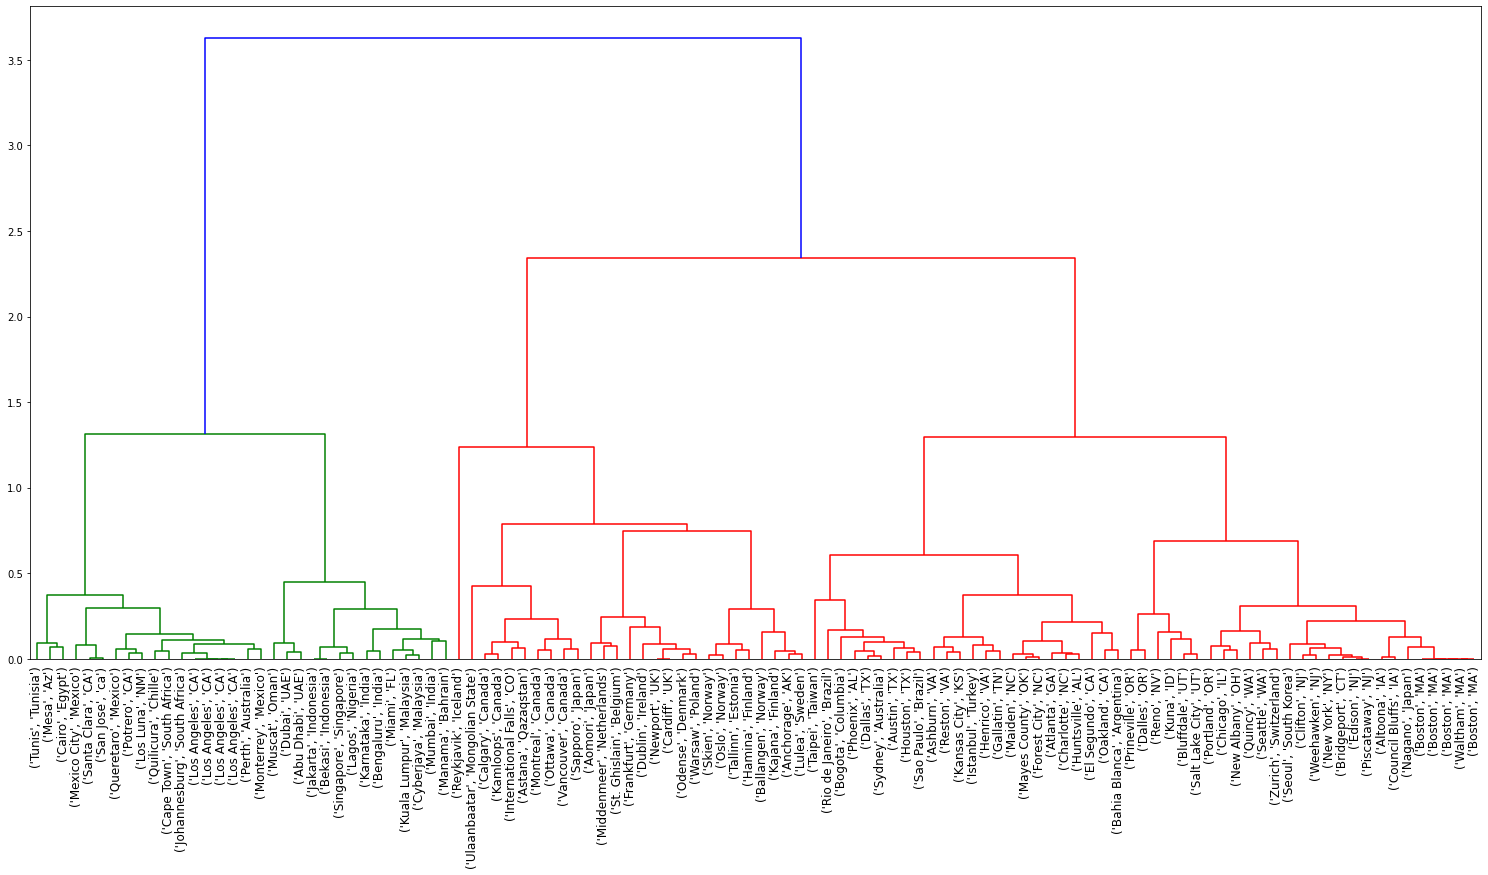

In [ ]:
Ndf = Ndf.set_index(['City Name','State Code/Country Name'])
Z = linkage(Ndf, 'ward',metric='euclidean')
plt.figure(figsize=(26,12))
dendrogram(Z,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           labels = Ndf.index,
           leaf_font_size=12)
plt.show()

In [ ]:
#Using fcluster add cluster count as 2 to make 2 groups for data
clusterCount = 2
clusters_agg = fcluster(Z, t=clusterCount, criterion='maxclust')
# fluster method assigns cluster index to data categorizing into 2 values.
Ndf["Cluster index"] = clusters_agg
# Changing the cluster index values to 0,1 from 1,2.
Ndf.loc[Ndf["Cluster index"] == 1, "Cluster index"] = 0
Ndf.loc[Ndf["Cluster index"] == 2, "Cluster index"] = 1

Ndf=Ndf.reset_index()
Ndf

,City Name,State Code/Country Name,Irradiance,Avg temp,Average NO2,Cluster index
0,Anchorage,AK,0.137084,0.126659,0.843482,1
1,International Falls,CO,0.405115,0.161657,0.767247,1
2,Waltham,MA,0.468542,0.371784,0.909884,1
3,Chicago,IL,0.475192,0.376455,0.848391,1
4,Dallas,TX,0.682353,0.674519,0.891963,1
...,...,...,...,...,...,...
105,Boston,MA,0.468542,0.371784,0.909884,1
106,Los Angeles,CA,0.923274,0.637896,0.913926,0
107,Los Angeles,CA,0.923274,0.637896,0.913926,0
108,Los Angeles,CA,0.923274,0.637896,0.913926,0


In [ ]:
clusters_agg

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
#3d scatter plot showing the clusters in 3d space.
scatter3dPlot = px.scatter_3d(Ndf, x='Irradiance', y='Avg temp', z='Average NO2',
              color='Cluster index', hover_data=['City Name','State Code/Country Name',"Irradiance","Avg temp","Average NO2"])
# to remove the legend since the values are supposed to be 0,1.
scatter3dPlot.update(layout_coloraxis_showscale=False)
scatter3dPlot.show()

In [ ]:
# 2d scatter matrix using plotly express
ScatterPlot1 = px.scatter_matrix(Ndf,
    dimensions=["Irradiance", "Avg temp", "Average NO2"],
    color="Cluster index", hover_data=['City Name','State Code/Country Name',"Irradiance","Avg temp","Average NO2"])
# removing the legend as color distinction shows the clusters.
ScatterPlot1.update(layout_coloraxis_showscale=False)
ScatterPlot1.show()

[Text(0, 0, '0'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.8'),
 Text(0, 0, '1')]

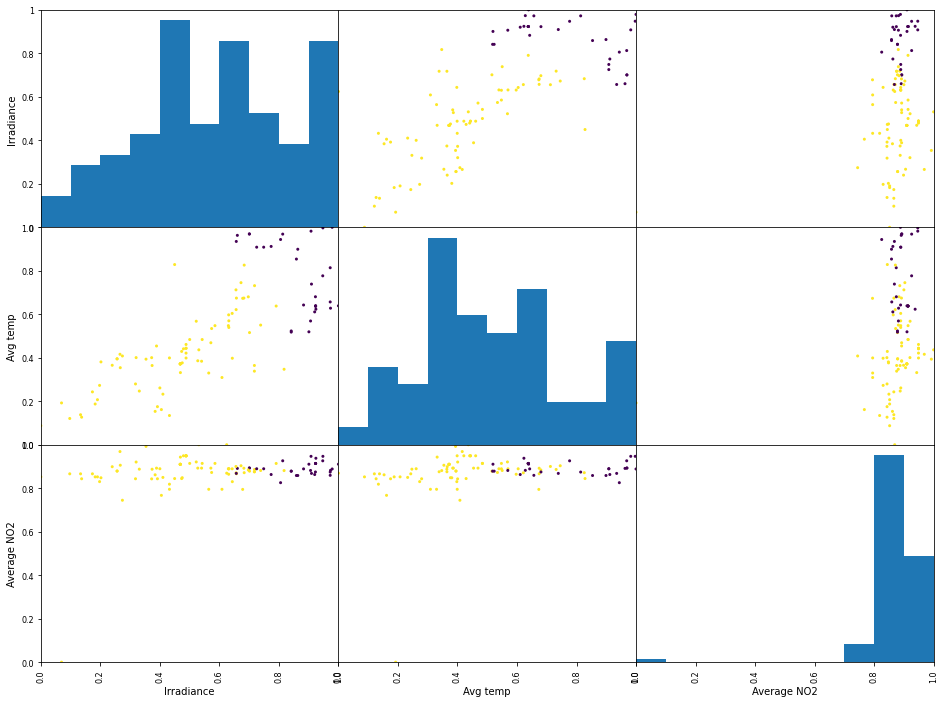

In [ ]:
# Pandas scatter matrix to show the cluster patters with 6 clusters.
X = Ndf[['Irradiance','Avg temp','Average NO2']];
y = Ndf['Cluster index'];
# removing irregular y axis values and plotting the scatter matix
axes=pd.plotting.scatter_matrix(X,c=y,range_padding=0,alpha=2, figsize=(16,12))
axes[0,0].set_yticklabels([0,0.2,0.4,0.6,0.8,1])

# **Running the Analysis for Cluster count 6:**

In [ ]:
# Considering 6 clusters and normalizing the data
clusterCount = 6
clusters_agg2 = fcluster(Z, t=clusterCount, criterion='maxclust')
normalized_df2 = Ndf.copy()
normalized_df2["Cluster index"] = clusters_agg2
Ndf.loc[Ndf["Cluster index"] == 6, "Cluster index"] = 0

In [ ]:
#3d scatter plot showing the clusters in 3d space.
scatter3dPlot = px.scatter_3d(normalized_df2, x='Irradiance', y='Avg temp', z='Average NO2',
              color='Cluster index', hover_data=['City Name','State Code/Country Name',"Irradiance","Avg temp","Average NO2"])

scatter3dPlot.update(layout_coloraxis_showscale=False)
scatter3dPlot.show()

In [ ]:
# Scatter plot showing 6 clusters
ScatterPlot2 = px.scatter_matrix(normalized_df2,
    dimensions=["Irradiance", "Avg temp", "Average NO2"],
    color="Cluster index", hover_data=["Irradiance","Avg temp","Average NO2",'City Name','State Code/Country Name'])
ScatterPlot2.update(layout_coloraxis_showscale=False)
ScatterPlot2.show()

[Text(0, 0, '0'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.8'),
 Text(0, 0, '1')]

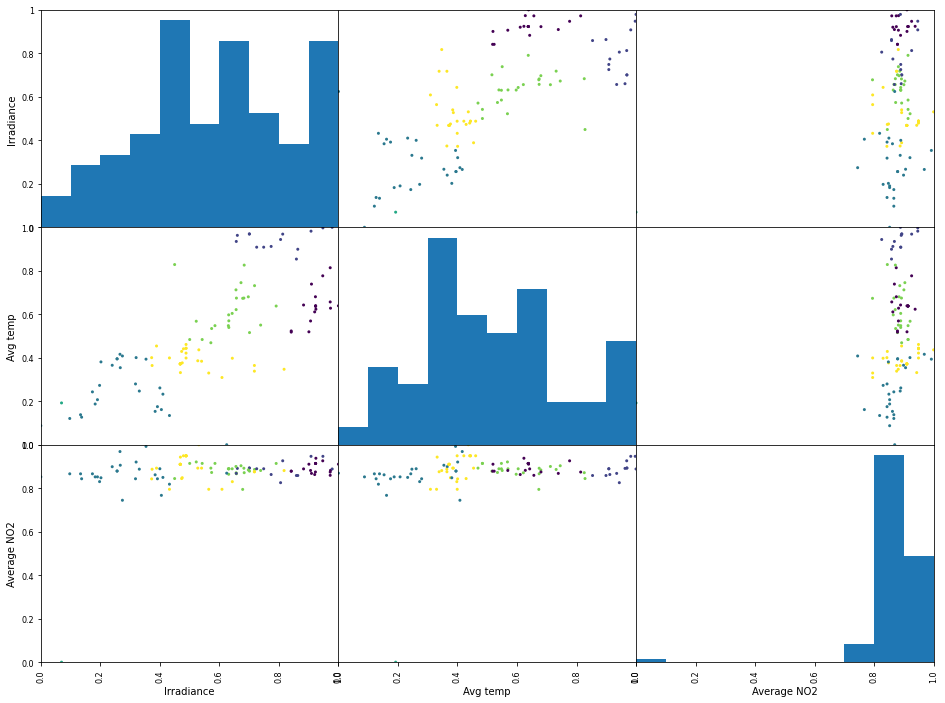

In [ ]:
X = normalized_df2[['Irradiance','Avg temp','Average NO2']];
y = normalized_df2['Cluster index'];
axes2=pd.plotting.scatter_matrix(X,c=y, range_padding=0, alpha=2, figsize=(16,12))
axes2[0,0].set_yticklabels([0,0.2,0.4,0.6,0.8,1])

In [ ]:
k_count=2
kmenas = normalized_df2.filter(items=['Irradiance','Avg temp','Average NO2'])
kviz,label = kmeans2(kmenas, k_count, iter=10, minit='++', missing='warn', check_finite=True)

In [ ]:
normalized_df3 = Ndf.copy()
normalized_df3["Cluster index"] = label
normalized_df3=normalized_df3.reset_index()
normalized_df3

,index,City Name,State Code/Country Name,Irradiance,Avg temp,Average NO2,Cluster index
0,0,Anchorage,AK,0.137084,0.126659,0.843482,0
1,1,International Falls,CO,0.405115,0.161657,0.767247,0
2,2,Waltham,MA,0.468542,0.371784,0.909884,0
3,3,Chicago,IL,0.475192,0.376455,0.848391,0
4,4,Dallas,TX,0.682353,0.674519,0.891963,1
...,...,...,...,...,...,...,...
105,105,Boston,MA,0.468542,0.371784,0.909884,0
106,106,Los Angeles,CA,0.923274,0.637896,0.913926,1
107,107,Los Angeles,CA,0.923274,0.637896,0.913926,1
108,108,Los Angeles,CA,0.923274,0.637896,0.913926,1


In [ ]:
#3d scatter plot of data obtained from k-means analysis
scatter3dPlot3 = px.scatter_3d(normalized_df3, x='Irradiance', y='Avg temp', z='Average NO2',
              color='Cluster index', hover_data=['City Name','State Code/Country Name',"Irradiance","Avg temp","Average NO2"])
# to remove the legend since the values are supposed to be 0,1.
scatter3dPlot3.update(layout_coloraxis_showscale=False)
scatter3dPlot3.show()

In [ ]:
# 2d scatter matrix using plotly express for data obtained from kmeans analysis 
ScatterPlot3 = px.scatter_matrix(normalized_df3,
    dimensions=["Irradiance", "Avg temp", "Average NO2"],
    color="Cluster index", hover_data=['City Name','State Code/Country Name',"Irradiance","Avg temp","Average NO2"])
# removing the legend as color distinction shows the clusters.
ScatterPlot3.update(layout_coloraxis_showscale=False)
ScatterPlot3.show()

[Text(0, 0, '0'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.8'),
 Text(0, 0, '1')]

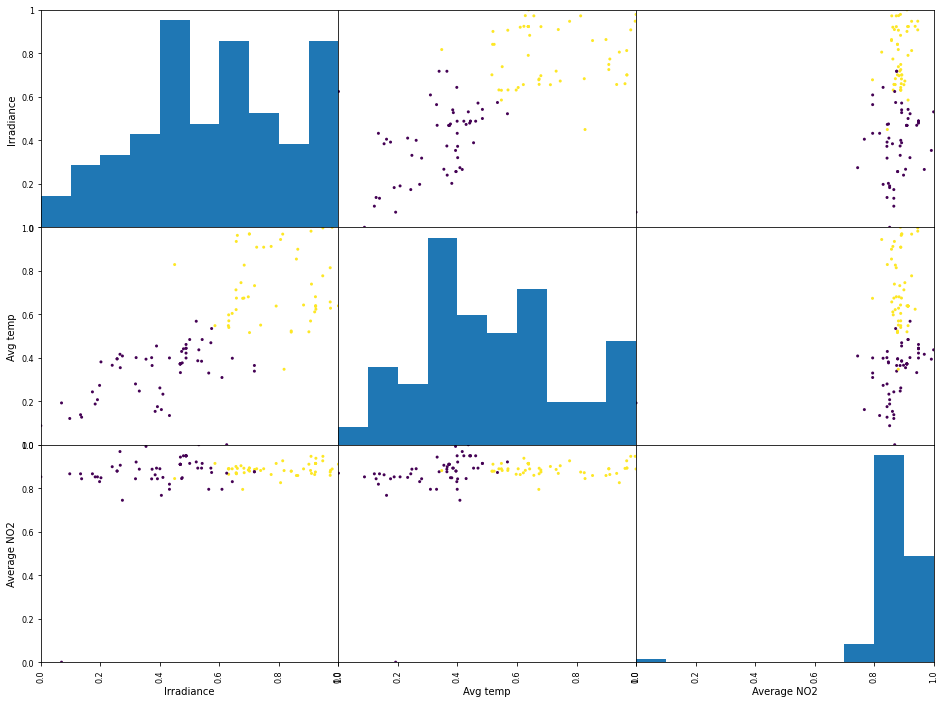

In [ ]:
# Pandas scatter matrix to show the cluster patters with 2 clusters.
X = normalized_df3[['Irradiance','Avg temp','Average NO2']];
y = normalized_df3['Cluster index'];
# removing irregular y axis values and plotting the scatter matix
axes2=pd.plotting.scatter_matrix(X,c=y,range_padding=0,alpha=2, figsize=(16,12))
axes2[0,0].set_yticklabels([0,0.2,0.4,0.6,0.8,1])